# **Tensorboard & Callbacks**

## **Library import**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.config.experimental import list_physical_devices, set_virtual_device_configuration, VirtualDeviceConfiguration

In [2]:
gpus = list_physical_devices('GPU')
set_virtual_device_configuration(gpus[0], [VirtualDeviceConfiguration(memory_limit=1200)])
print(len(gpus), "Physical GPUs")

1 Physical GPUs


## **Data**

(60000, 28, 28)

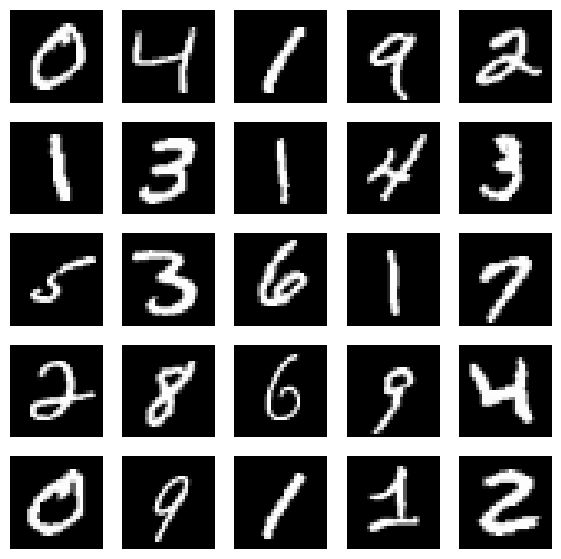

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

plt.figure(figsize=(7,7))
x = 1
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,x)
        plt.imshow(X_train[x], cmap="gray");
        plt.axis("off")
        x += 1
        
X_train.shape

## **Compile & Fit Model**

### **Simple network**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


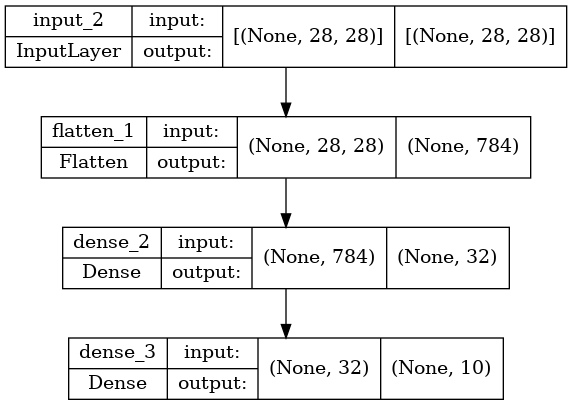

In [6]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [7]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3889 - accuracy: 0.8935 - val_loss: 0.2480 - val_accuracy: 0.9306
Epoch 2/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2231 - accuracy: 0.9369 - val_loss: 0.1910 - val_accuracy: 0.9446
Epoch 3/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1766 - accuracy: 0.9497 - val_loss: 0.1669 - val_accuracy: 0.9503
Epoch 4/5
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1492 - accuracy: 0.9568 - val_loss: 0.1453 - val_accuracy: 0.9560
Epoch 5/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1310 - accuracy: 0.9620 - val_loss: 0.1318 - val_accuracy: 0.9618


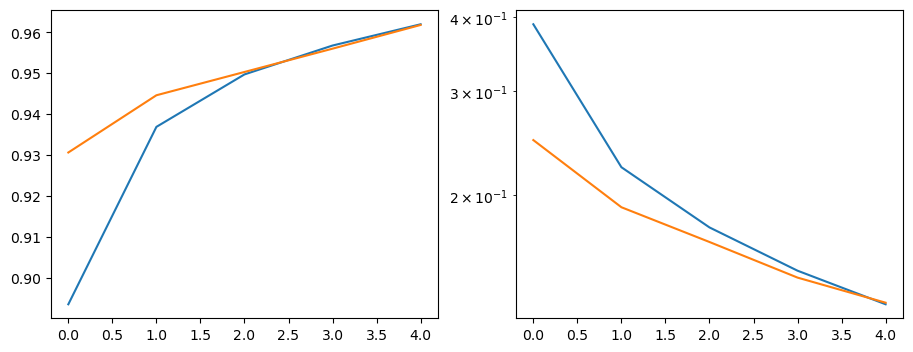

In [8]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);
plt.yscale("log")

### **Bigger network**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


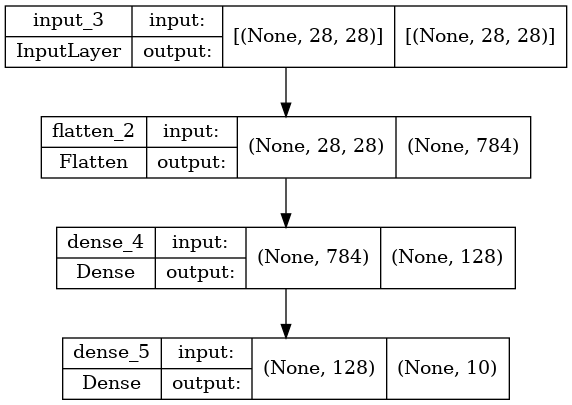

In [9]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [10]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2874 - accuracy: 0.9184 - val_loss: 0.1506 - val_accuracy: 0.9560
Epoch 2/5
3750/3750 [==============================] - 15s 4ms/step - loss: 0.1313 - accuracy: 0.9619 - val_loss: 0.1051 - val_accuracy: 0.9674
Epoch 3/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0893 - accuracy: 0.9739 - val_loss: 0.0923 - val_accuracy: 0.9726
Epoch 4/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0670 - accuracy: 0.9805 - val_loss: 0.0804 - val_accuracy: 0.9748
Epoch 5/5
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0813 - val_accuracy: 0.9752


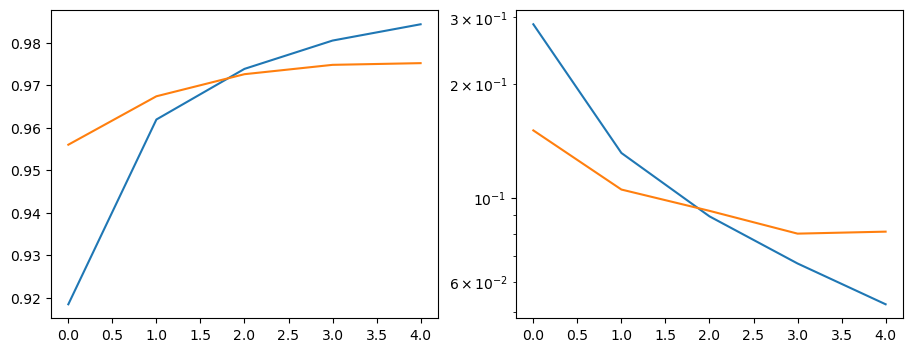

In [11]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);
plt.yscale("log")

### **Convolutional layer**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                250890    
                                                                 
Total params: 251,050
Trainable params: 251,050
Non-trainable params: 0
_________________________________________________________________


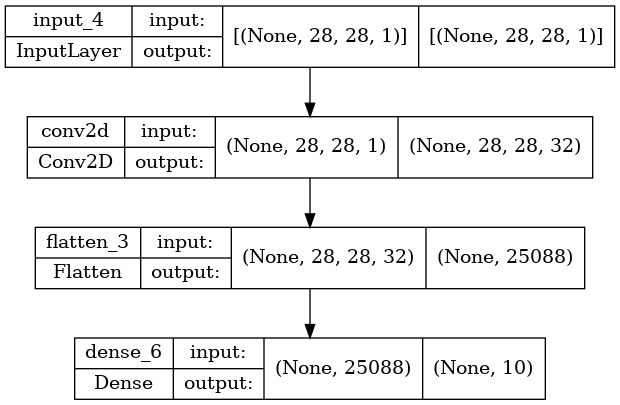

In [12]:
model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (2,2), padding="same", activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [13]:
X_train_conv = X_train.reshape(*X_train.shape,1)
X_test_conv = X_test.reshape(*X_test.shape,1)

history = model.fit(X_train_conv, y_train, 
                    validation_data = (X_test_conv, y_test),
                    batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 19s 5ms/step - loss: 0.2784 - accuracy: 0.9221 - val_loss: 0.1512 - val_accuracy: 0.9581
Epoch 2/5
3750/3750 [==============================] - 19s 5ms/step - loss: 0.1167 - accuracy: 0.9677 - val_loss: 0.0964 - val_accuracy: 0.9718
Epoch 3/5
3750/3750 [==============================] - 21s 6ms/step - loss: 0.0731 - accuracy: 0.9795 - val_loss: 0.0771 - val_accuracy: 0.9759
Epoch 4/5
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0529 - accuracy: 0.9850 - val_loss: 0.0744 - val_accuracy: 0.9769
Epoch 5/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0421 - accuracy: 0.9882 - val_loss: 0.0749 - val_accuracy: 0.9763


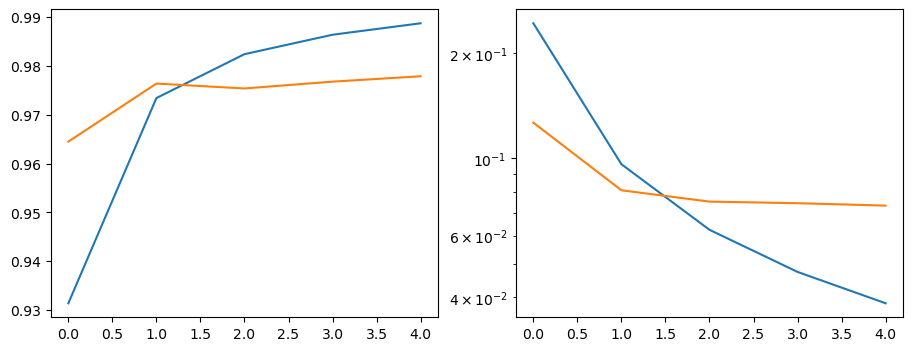

In [12]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);
plt.yscale("log")

## **Tensorboard**

https://www.tensorflow.org/tensorboard

https://keras.io/api/callbacks/tensorboard/

In [14]:
from tensorflow.keras.callbacks import TensorBoard

In [5]:
callbacks = [TensorBoard(log_dir="logs/name", update_freq="epoch")]

!tensorboard --logdir "logs"

In [15]:
callbacks = [TensorBoard(log_dir="logs/dense_32", update_freq="epoch")]

model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          batch_size=16, epochs=10,
          callbacks=callbacks)

Epoch 1/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3889 - accuracy: 0.8939 - val_loss: 0.2393 - val_accuracy: 0.9309
Epoch 2/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2089 - accuracy: 0.9415 - val_loss: 0.1765 - val_accuracy: 0.9473
Epoch 3/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1661 - accuracy: 0.9510 - val_loss: 0.1585 - val_accuracy: 0.9505
Epoch 4/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1413 - accuracy: 0.9581 - val_loss: 0.1381 - val_accuracy: 0.9567
Epoch 5/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.1236 - accuracy: 0.9629 - val_loss: 0.1343 - val_accuracy: 0.9604
Epoch 6/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1111 - accuracy: 0.9664 - val_loss: 0.1249 - val_accuracy: 0.9605
Epoch 7/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1009 - accuracy: 0.9700 - val_loss: 0.1207 - val_ac

In [16]:
callbacks = [TensorBoard(log_dir="logs/dense_128", update_freq="epoch")]

model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          batch_size=16, epochs=10,
          callbacks=callbacks)

Epoch 1/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2899 - accuracy: 0.9183 - val_loss: 0.1547 - val_accuracy: 0.9542
Epoch 2/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1321 - accuracy: 0.9607 - val_loss: 0.1177 - val_accuracy: 0.9646
Epoch 3/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0916 - accuracy: 0.9730 - val_loss: 0.0942 - val_accuracy: 0.9716
Epoch 4/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0687 - accuracy: 0.9799 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 5/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.0719 - val_accuracy: 0.9768
Epoch 6/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0741 - val_accuracy: 0.9763
Epoch 7/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0701 - val_ac

In [17]:
callbacks = [TensorBoard(log_dir="logs/conv2d_32_2x2", update_freq="epoch")]

model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (2,2), padding="same", activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_conv = X_train.reshape(*X_train.shape,1)
X_test_conv = X_test.reshape(*X_test.shape,1)

history = model.fit(X_train_conv, y_train, 
                    validation_data = (X_test_conv, y_test),
                    batch_size=16, epochs=10,
                    callbacks=callbacks)

Epoch 1/10
3750/3750 [==============================] - 20s 5ms/step - loss: 0.2420 - accuracy: 0.9319 - val_loss: 0.1271 - val_accuracy: 0.9635
Epoch 2/10
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0948 - accuracy: 0.9738 - val_loss: 0.0818 - val_accuracy: 0.9759
Epoch 3/10
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0640 - accuracy: 0.9821 - val_loss: 0.0740 - val_accuracy: 0.9766
Epoch 4/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0484 - accuracy: 0.9859 - val_loss: 0.0812 - val_accuracy: 0.9732
Epoch 5/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0731 - val_accuracy: 0.9774
Epoch 6/10
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0320 - accuracy: 0.9908 - val_loss: 0.0712 - val_accuracy: 0.9777
Epoch 7/10
3750/3750 [==============================] - 19s 5ms/step - loss: 0.0255 - accuracy: 0.9929 - val_loss: 0.0745 - val_ac

## **Images**

https://www.tensorflow.org/tensorboard/image_summaries

In [18]:
import io

def plot(img, pred):
    fig = plt.figure(figsize=(5,5))
    plt.title(pred)
    plt.axis("off")
    plt.imshow(img, cmap=plt.cm.binary)
    return fig

def plot_to_image(figure):
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    image = tf.expand_dims(image, 0)
    return image

In [19]:
logdir = "logs/conv2d_32_2x2/validation"
with tf.summary.create_file_writer(logdir).as_default():
    for i in range(10):
        img = X_test[i]
        y_pred = model.predict(img.reshape(-1,28,28,1))
        y_pred = np.argmax(y_pred)
        
        tf.summary.image("10 training data examples", 
                         plot_to_image(plot(img, y_pred)), max_outputs=25, step=i)

### **only wrong images**

In [20]:
def plot(img, pred, true):
    fig = plt.figure(figsize=(5,5))
    plt.title(f"{pred} (true {true})")
    plt.axis("off")
    plt.imshow(img, cmap=plt.cm.binary)
    return fig

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
wrong = (y_pred == y_test) == False

with tf.summary.create_file_writer(logdir).as_default():
    for i in range(10):
        img = X_test[wrong][i]
        true = y_test[wrong][i]
        pred = y_pred[wrong][i]
        tf.summary.image("10 mistakenly classified images", 
                         plot_to_image(plot(img, pred, true)), max_outputs=25, step=i)

### **Confusion matrix**

In [21]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_pred, y_test):
    fig = plt.figure(figsize=(6,6))
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm)

    for i in range(10):
        for j in range(10):
            plt.text(i,j,cm[i,j], ha="center", va="center")

    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))

    return fig

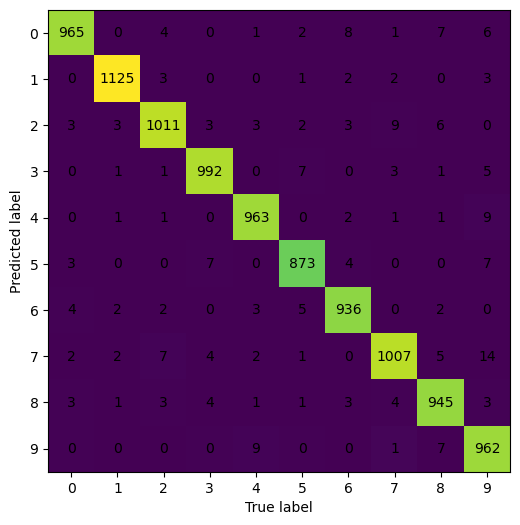

In [22]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_pred, y_test);

In [23]:
with tf.summary.create_file_writer(logdir).as_default():
    tf.summary.image("Confusion matrix", plot_to_image(plot_confusion_matrix(y_pred, y_test)), step=0)

## **Callbacks**

https://keras.io/api/callbacks/

### **Reduce learning rate**

https://keras.io/api/callbacks/reduce_lr_on_plateau/

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [26]:
callbacks = [TensorBoard(log_dir="logs/conv2d_reduce_lr", update_freq="epoch"),
             ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3,
                               min_lr=0.0, verbose=1)]

model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (2,2), padding="same", activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_conv = X_train.reshape(*X_train.shape,1)
X_test_conv = X_test.reshape(*X_test.shape,1)

history = model.fit(X_train_conv, y_train, 
                    validation_data = (X_test_conv, y_test),
                    batch_size=16, epochs=10,
                    callbacks=callbacks)

Epoch 1/10
3750/3750 [==============================] - 19s 5ms/step - loss: 0.2591 - accuracy: 0.9265 - val_loss: 0.1382 - val_accuracy: 0.9623 - lr: 5.0000e-04
Epoch 2/10
3750/3750 [==============================] - 20s 5ms/step - loss: 0.1095 - accuracy: 0.9693 - val_loss: 0.0918 - val_accuracy: 0.9719 - lr: 5.0000e-04
Epoch 3/10
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0723 - accuracy: 0.9796 - val_loss: 0.0735 - val_accuracy: 0.9768 - lr: 5.0000e-04
Epoch 4/10
3750/3750 [==============================] - 21s 6ms/step - loss: 0.0543 - accuracy: 0.9846 - val_loss: 0.0714 - val_accuracy: 0.9791 - lr: 5.0000e-04
Epoch 5/10
3750/3750 [==============================] - 21s 6ms/step - loss: 0.0427 - accuracy: 0.9881 - val_loss: 0.0752 - val_accuracy: 0.9765 - lr: 5.0000e-04
Epoch 6/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0348 - accuracy: 0.9902 - val_loss: 0.0711 - val_accuracy: 0.9769 - lr: 5.0000e-04
Epoch 7/10
3750/3750 [======

### **LambdaCallback**

In [27]:
from tensorflow.keras.callbacks import LambdaCallback

In [28]:
def batchOutput(batch, logs):
    tf.summary.scalar('batch_accuracy', data=logs['accuracy'], step=batch)
    return batch

callbacks = [TensorBoard(log_dir="logs/write_per_batch", update_freq="batch"),
             LambdaCallback(on_batch_end=batchOutput,)]

model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (2,2), padding="same", activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_conv = X_train.reshape(*X_train.shape,1)
X_test_conv = X_test.reshape(*X_test.shape,1)

model.fit(X_train_conv, y_train,
          validation_data = (X_test_conv, y_test),
          batch_size=16, epochs=1,
          callbacks=callbacks)

3750/3750 [==============================] - 29s 8ms/step - loss: 0.1918 - accuracy: 0.9445 - val_loss: 0.0938 - val_accuracy: 0.9704


## **Tuning HyperParams**

https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams

In [29]:
from tensorflow.keras.callbacks import TensorBoard

X_train_conv = X_train.reshape(*X_train.shape,1)
X_test_conv = X_test.reshape(*X_test.shape,1)

In [30]:
from tensorboard.plugins.hparams import api as hp

filters = hp.HParam('filters', hp.Discrete([16, 32]))
learning_rate = hp.HParam('learning_rate', hp.Discrete([1e-3, 1e-4]))
dropout = hp.HParam('dropout', hp.Discrete([0.0, 0.2]))

In [31]:
def get_model(filters, dropout, learning_rate):
    model = Sequential()
    model.add(Input((28,28,1)))
    model.add(Conv2D(filters, (2,2), padding="same", activation='relu'))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def train_test_model(hparams):
    model = get_model(hparams[filters], hparams[dropout], hparams[learning_rate])

    name = "hp_{0}_{1}_{2}".format(hparams[filters], hparams[dropout], hparams[learning_rate])
    logdir = "logs/hparam_tuning/" + name

    callbacks = [TensorBoard(log_dir=logdir, update_freq="epoch"),
                 hp.KerasCallback(logdir, hparams)]
    
    model.fit(X_train_conv, y_train, 
              batch_size=16, epochs=10, 
              callbacks=callbacks)
    _, accuracy = model.evaluate(X_test_conv, y_test)
    
    with tf.summary.create_file_writer(logdir).as_default():
        tf.summary.scalar("accuracy", accuracy, step=0)

In [32]:
for N in filters.domain.values:
    for LR in learning_rate.domain.values:
        for D in dropout.domain.values:
            hparams = {filters : N,
                       dropout : D,
                       learning_rate : LR}

            print({h.name: hparams[h] for h in hparams})
            train_test_model(hparams)

{'filters': 16, 'dropout': 0.0, 'learning_rate': 0.0001}
Epoch 1/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.4912 - accuracy: 0.8792
Epoch 2/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2664 - accuracy: 0.9240
Epoch 3/10
 279/3750 [=>............................] - ETA: 14s - loss: 0.2214 - accuracy: 0.9306

KeyboardInterrupt: 

### **Keras tuner**

https://keras.io/keras_tuner/

In [33]:
import keras_tuner

In [34]:
def build_model(hp):
    model = Sequential()
    model.add(Input((28,28,1)))
    model.add(Conv2D(hp.Choice('filters', [8, 16, 32]), (2,2), padding="same", activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.2, step=0.05)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4, 5e-4, 1e-3, 5e-3])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [35]:
tuner = keras_tuner.RandomSearch(build_model, 
                                 objective='val_loss', 
                                 max_trials=12,
                                 directory="logs/keras_tuner")

logdir = "logs/keras_tuner"
callbacks = [TensorBoard(log_dir=logdir, update_freq="epoch")]

tuner.search(X_train_conv, y_train, 
             validation_data=(X_test_conv, y_test),
             batch_size=16, epochs=5,
             callbacks=callbacks)

Trial 1 Complete [00h 01m 18s]
val_loss: 0.26877087354660034

Best val_loss So Far: 0.26877087354660034
Total elapsed time: 00h 01m 18s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
32                |8                 |filters
0.05              |0.05              |dropout
0.0001            |0.0001            |learning_rate

Epoch 1/5
   1/3750 [..............................] - ETA: 42:44 - loss: 2.2959 - accuracy: 0.0625WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0030s vs `on_train_batch_end` time: 0.0049s). Check your callbacks.


 394/3750 [==>...........................] - ETA: 18s - loss: 1.1692 - accuracy: 0.7716

KeyboardInterrupt: 

In [11]:
best_model = tuner.get_best_models()[0]

tuner.get_best_hyperparameters()[0].values

{'filters': 32, 'dropout': 0.2, 'learning_rate': 0.0005}

In [12]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 251,050
Trainable params: 251,050
Non-trainable params: 0
_________________________________________________________________


### **Autokeras**

https://autokeras.com/

## **Tensorboard inline**

In [36]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/

## **Tensorboard dev**

https://tensorboard.dev/

In [38]:
!tensorboard dev upload --logdir logs --name "MNIST Digits"

Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/zU378ijzQWq5X4zev4f4RQ/

[2022-11-28T19:42:59] Started scanning logdir.
[2022-11-28T19:43:17] Total uploaded: 4356 scalars, 24 tensors (144 B), 17 binary objects (524.7 kB)
^C2KListening for new data in logdir...


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/zU378ijzQWq5X4zev4f4RQ/


In [39]:
!tensorboard dev delete --experiment_id  zU378ijzQWq5X4zev4f4RQ

Deleted experiment zU378ijzQWq5X4zev4f4RQ.
